# 6.6 SOURCING AND ANALYZING TIME SERIES DATA

### This script contains the following:
#### 1. IMPORTING DATA AND DATA LIBRARIES
#### 2.FORMATTING TIME-SERIES DATA
#### 3. PLOTTING TIME-SERIES
#### 4. TIME-SERIES ANALYSIS: DECOMPOSITION
#### 5. TESTING FOR STATIONARITY
#### 6. CHECKING FOR AUTOCORRELATIONS

### 1.IMPORTING DATA AND DATA LIBRARIES

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings 

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight') 

In [2]:
path = r'C:\Users\gryzu\Supply Chain Management'

In [3]:
path

'C:\\Users\\gryzu\\Supply Chain Management'

### IMPORTING DATASET

In [21]:
# The dataset has been previosly cleaned for time-series analysis, by dropping all unnecessary columns in EXCEL. 
# Now we have left only Date of Order (2015-2018) and Sales Number columns, since we want to see how total sales number evolved over the time. 
# The dataset has been cleaned before.
asia = pd.read_excel(os.path.join(path, '1 DATA', 'ASIASCM_TIME_SERIES.xlsx')) 

In [5]:
asia.shape

(15101, 2)

In [6]:
asia.head()

,Order Date,Sales
0,1/13/2016 0:20,199.990005
1,1/13/2016 0:20,399.980011
2,1/13/2016 0:20,399.980011
3,1/13/2016 0:20,199.979996
4,1/13/2016 0:20,299.950012


In [7]:
asia.tail()

,Order Date,Sales
15096,9/30/2016 19:46,200.000000
15097,9/30/2016 19:46,199.990005
15098,9/30/2016 19:46,199.990005
15099,9/30/2016 6:27,129.990005
15100,9/30/2016 6:27,99.959999


### 2.FORMATTING TIME-SERIES DATA

In [8]:
# Convert 'Order Date' column to datetime format
asia['Order Date'] = pd.to_datetime(asia['Order Date'])

In [9]:
# Set 'Order Date' as the index
asia.set_index('Order Date', inplace=True)

In [10]:
# Resample the data to yearly frequency and sum the sales for each year
asia_yearly = asia.resample('Y').sum()

### 3. PLOTTING TIME-SERIES

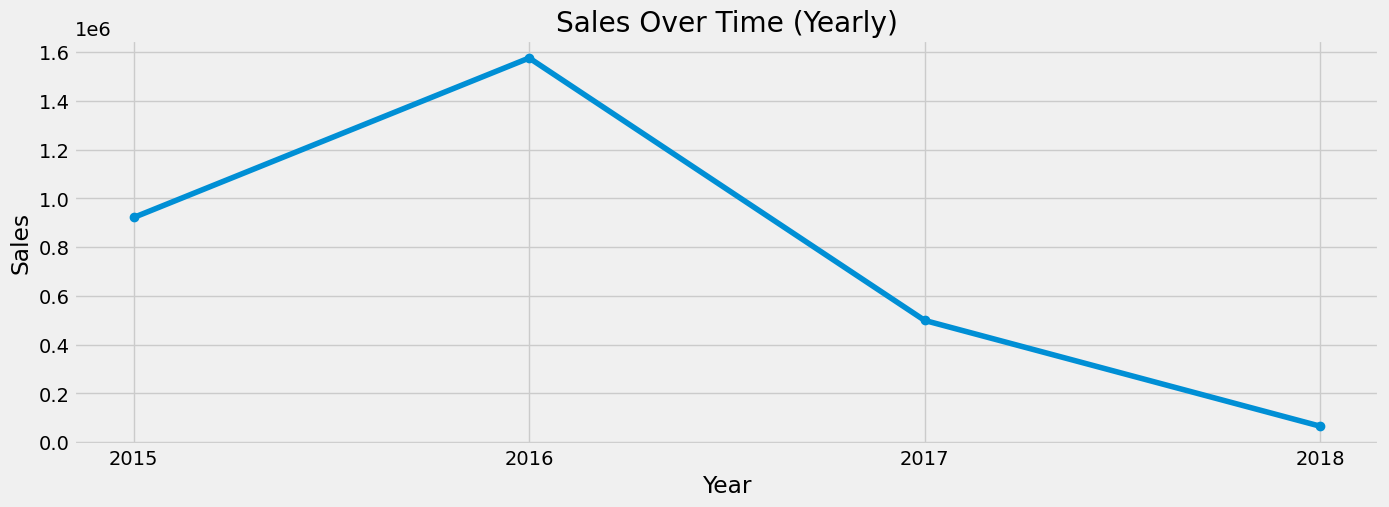

In [17]:
# Plot the time series
plt.figure(figsize=(15,5), dpi=100)
plt.plot(asia_yearly.index.year, asia_yearly['Sales'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sales Over Time (Yearly)')
plt.grid(True)
plt.xticks(asia_yearly.index.year)  
plt.show()

In our supply chain analysis it is not necessary to subset the data, we are analysing the data only in the period from 2015 till 2018 (no older or newer data is available in our case). Therefore we can continue our analysis. On the plot we see, that the total sales number was increasing from 2015 till 2016. However, after the year 2016 we exhibit a sharp decline which continued till the year 2018.

In [19]:
# Check for missing values (you shouldn't have any)

asia.isnull().sum() 

Order Date    0
Sales         0
dtype: int64

In [22]:
# Checking for duplicates 
dups = asia.duplicated()
dups.sum()

849

In [23]:
# Remove duplicates from the DataFrame
asia.drop_duplicates(inplace=True)

In [24]:
# Checking for duplicates again to confirm
dups = asia.duplicated()
dups.sum()

0

### 4. TIME-SERIES ANALYSIS: DECOMPOSITION

In [27]:
# Convert 'Order Date' column to datetime format
asia['Order Date'] = pd.to_datetime(asia['Order Date'])

In [28]:
# Set 'Order Date' as the index
asia.set_index('Order Date', inplace=True)

In [30]:
# Resample the data on a yearly basis and take the sum of sales for each year
asia_yearly = asia['Sales'].resample('Y').sum()

# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(asia_yearly, model='additive')

In [31]:
from pylab import rcParams 

rcParams['figure.figsize'] = 18, 7

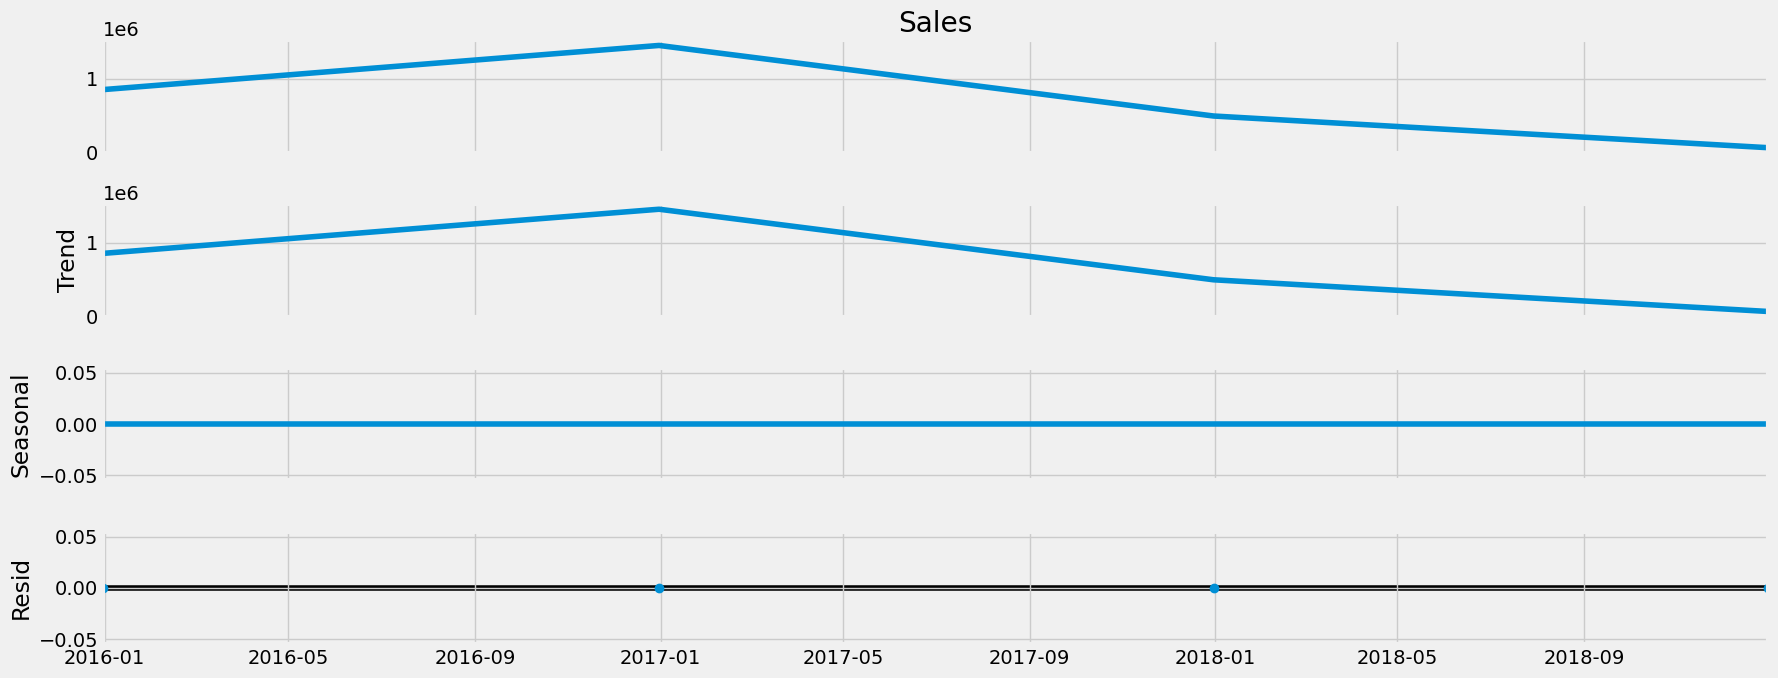

In [32]:
# Plot the separate components

decomposition.plot()
plt.show()

It has a trend which is already described above. The sales are going up till 2016 and then they are going down till 2018. The time-series has no seasonality factor, meaning that the reason for increased and decreased sales lays in something else. It is necessary to analyse another aspects (such as late delivery shipment, type of shipment chosen, type of goods and etc), which can potentially influence the total sales. Lastly, we cannot observe many residuals, what makes our time series analysis more precise. 

### 5. TESTING FOR STATIONARITY

In [33]:
from statsmodels.tsa.stattools import adfuller

In [38]:
def dickey_fuller(timeseries): 
    # Perform the Dickey-Fuller test:
   print('Dickey-Fuller Stationarity test:')
test = adfuller(asia['Sales'], autolag='AIC')  
result = pd.Series(test[0:4], index=['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])
for key, value in test[4].items():
    result['Critical Value (%s)' % key] = value
    
print(result)

Test Statistic                -1.609935e+01
p-value                        5.151594e-29
Number of Lags Used            3.900000e+01
Number of Observations Used    1.421200e+04
Critical Value (1%)           -3.430810e+00
Critical Value (5%)           -2.861743e+00
Critical Value (10%)          -2.566878e+00
dtype: float64


The critical values at the 1%, 5%, and 10% significance levels are approximately -3.43, -2.86, and -2.57 respectively.

Given the low p-value (much less than 0.05) and the test statistic being lower than the critical values, we can reject the null hypothesis. This suggests that the 'Sales' data is stationary, meaning it does not have a unit root and is likely to exhibit a stable trend over time.

### 6. CHECKING FOR AUTOCORRELATIONS

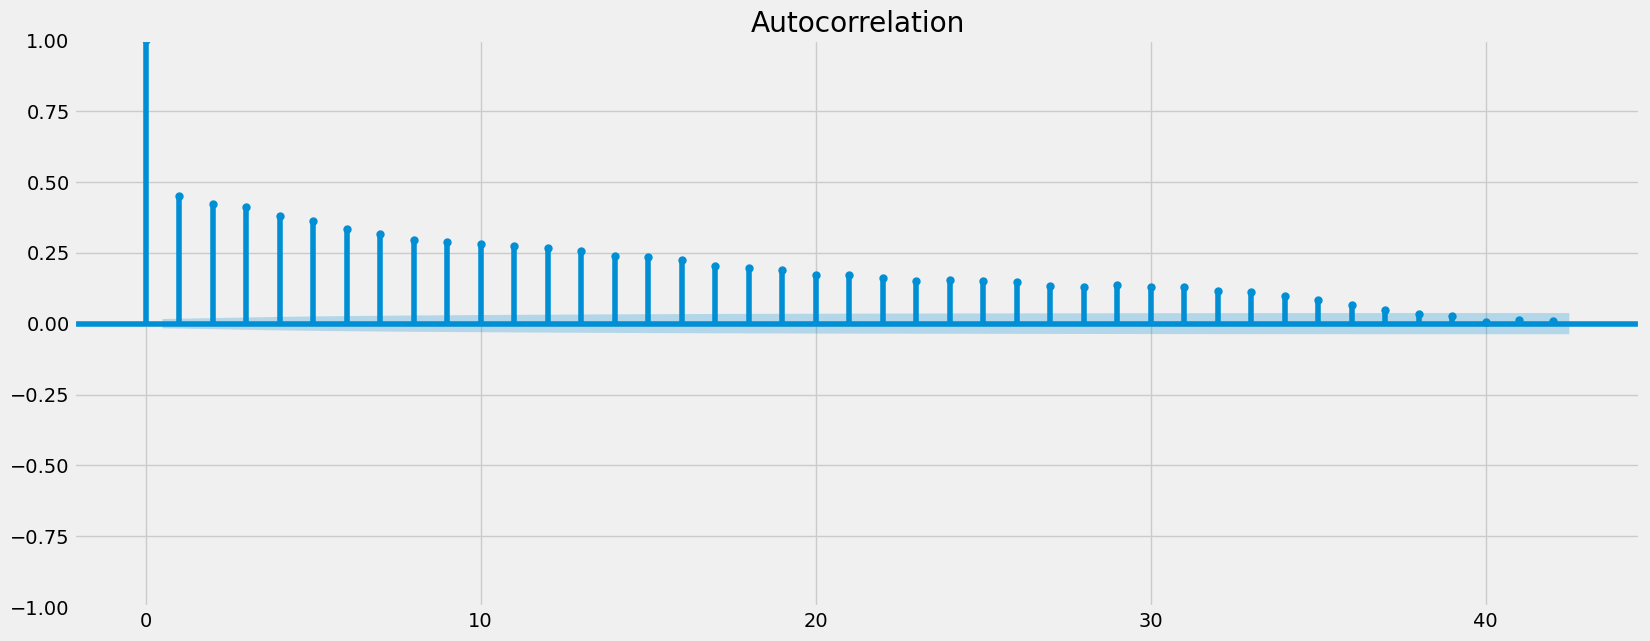

In [39]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(asia)
plt.show()

The majority vertical lines go above the blue edge of the confidence interval, this means we have lags that are significantly correlated with each other. It means that our time-series are stationary (as proved before by checking the p-value) and we can make a forecast with this data.